In [3]:
!sqlite3 products.db

zsh:1: command not found: sqlite3


In [42]:
from src.sql_export import SQLExporter
import sqlite3

In [43]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
db_name = "products.db"
conn = sqlite3.connect(db_name)

# Load data from the 'products' table
products_query = "SELECT * FROM products;"
products_df = pd.read_sql_query(products_query, conn)

# Load data from the 'parts' table
parts_query = "SELECT * FROM parts;"
parts_df = pd.read_sql_query(parts_query, conn)

# Load data from the 'materials' table
materials_query = "SELECT * FROM materials;"
materials_df = pd.read_sql_query(materials_query, conn)

In [44]:
products_df

,product_id,product_category,product_sub_category,original_care_label
0,#113,pant,,"Main: 40% Cotton, 60% Polyester, 290 g/m².\nCo..."
1,#212,pant,,"Main: DuraTwill, 52% Cotton 48% Polyamide, 240..."
2,#213,pant,,"Main: 40% Cotton, 60% Polyester, 290 g/m².\nCo..."
3,#214,pant,,"Main: Canvas+, 60% Cotton, 40% Polyester, 340 ..."
4,#312,pant,,"Main: DuraTwill, 52% Cotton 48% Polyamide, 240..."
...,...,...,...,...
568,#9794,pant,,100% CORDURA®-Polyamide 300 g/m².
569,#9795,accessory,phone case,100% Leather.
570,#9796,accessory,phone case,100% Polyamide.
571,#9797,pant,,"49% modacrylic FR, 42% cotton, 5% aramid, 3% p..."


In [45]:
materials_df.describe(include='all')

,fiber_id,product_id,part_id,part_name,fiber_name,fiber_proportion,brand,original_fiber_name,made_in_france,solution_dyed,recycled
count,2197.000000,2197,2197.000000,2197,2197,2197.000000,2197,2197,2197.000000,2197.000000,2197.000000
unique,NaN,565,NaN,25,93,NaN,4,175,NaN,NaN,NaN
top,NaN,#6367,NaN,unknown,polyester,NaN,,polyester,NaN,NaN,NaN
freq,NaN,15,NaN,761,564,NaN,1881,304,NaN,NaN,NaN
mean,1099.000000,NaN,528.509331,NaN,NaN,50.193673,NaN,NaN,0.035503,0.023213,0.043241
std,634.363592,NaN,290.883723,NaN,NaN,35.669261,NaN,NaN,0.185089,0.150615,0.203445
min,1.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,550.000000,NaN,276.000000,NaN,NaN,16.000000,NaN,NaN,0.000000,0.000000,0.000000
50%,1099.000000,NaN,537.000000,NaN,NaN,45.000000,NaN,NaN,0.000000,0.000000,0.000000
75%,1648.000000,NaN,777.000000,NaN,NaN,90.000000,NaN,NaN,0.000000,0.000000,0.000000


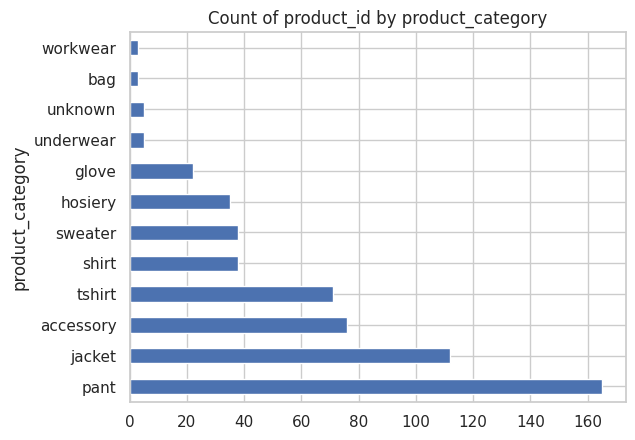

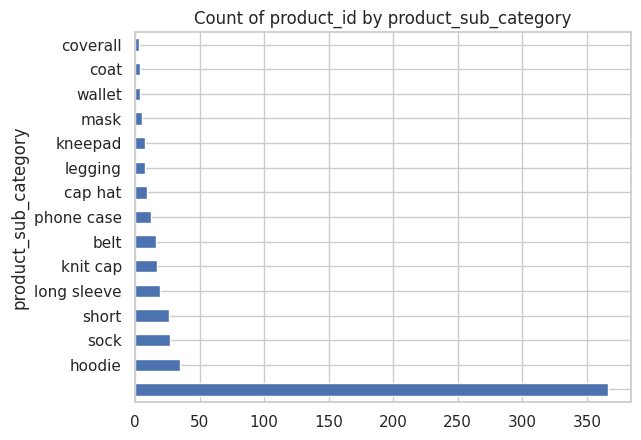

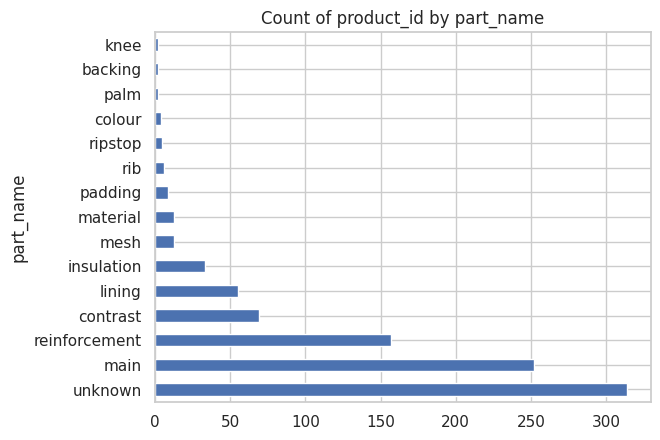

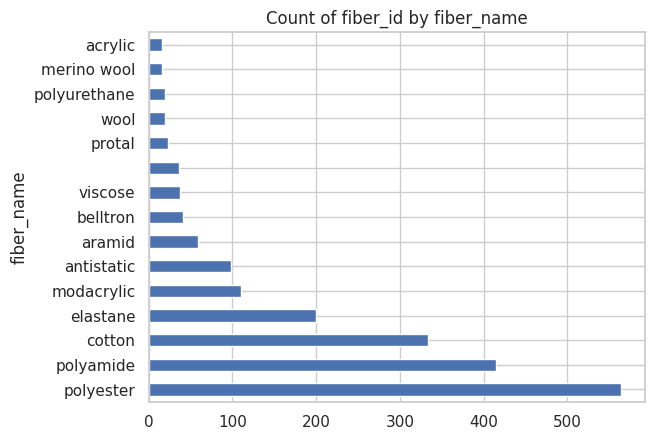

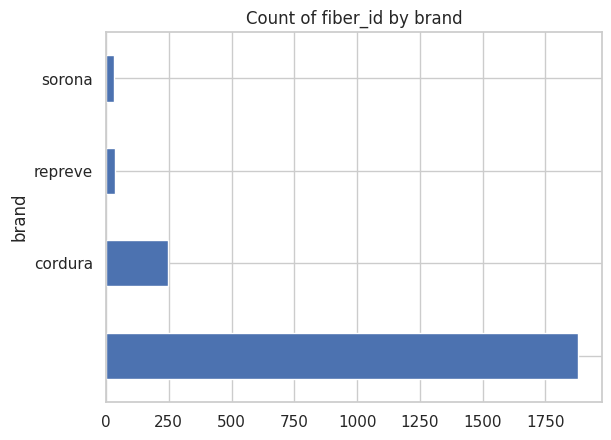

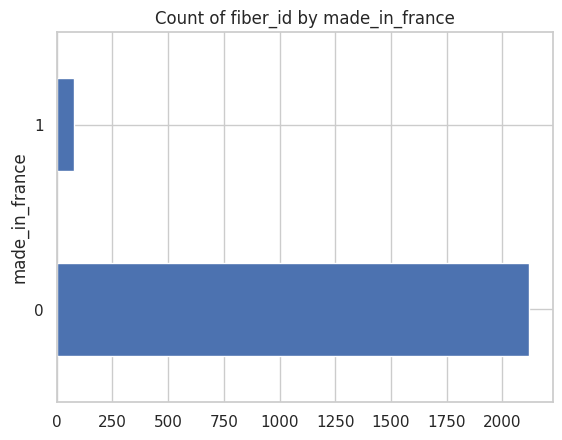

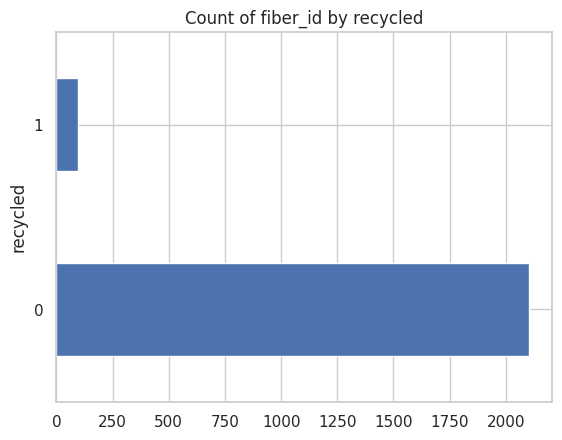

In [ ]:
def plot_count(df, col, id_col):
    df.groupby(col)[id_col].nunique().sort_values(ascending=False).head(15).plot(kind='barh')
    plt.title(f'Count of {id_col} by {col}')
    plt.show()
    

plot_count(products_df, 'product_category', 'product_id')
plot_count(products_df, 'product_sub_category', 'product_id')
plot_count(parts_df, 'part_name', 'product_id')
plot_count(materials_df, 'material_name', 'material_id')
plot_count(materials_df, 'brand', 'material_id')
plot_count(materials_df, 'made_in_france', 'material_id')
plot_count(materials_df, 'recycled', 'material_id')

In [48]:
# analyze product category / material.

df = pd.merge(products_df, materials_df, on='product_id', how='left')
grouped_df = df.groupby(['product_category', 'material_name'])['product_id'].nunique().reset_index()
grouped_df = grouped_df.pivot(index='material_name', columns='product_category', values='product_id').fillna(0)
grouped_df['total'] = grouped_df.sum(axis=1)
top_material = grouped_df.sort_values('total', ascending=False).head(15)

<Axes: xlabel='product_category', ylabel='fiber_name'>

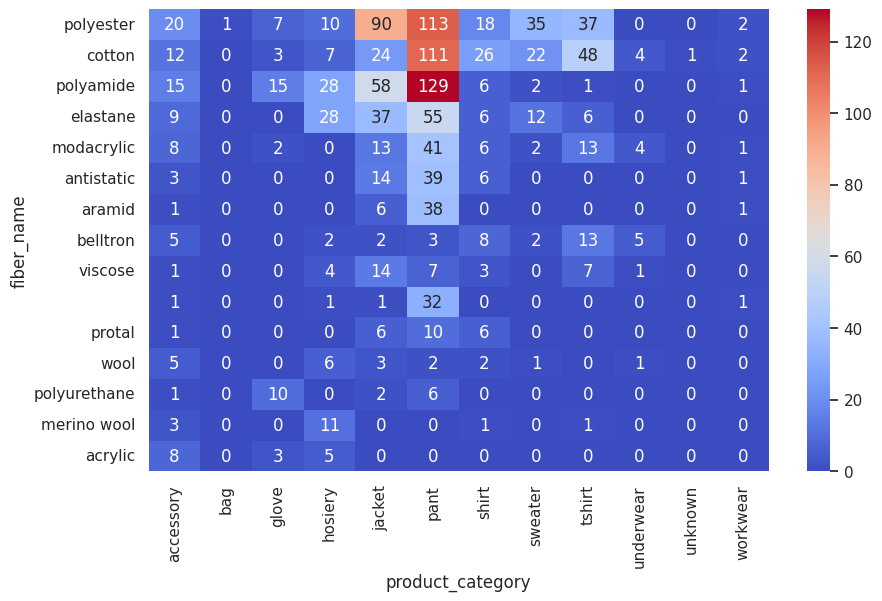

In [ ]:
# display the plot with seaborn
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.heatmap(top_material.drop('total', axis=1), annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Top 15 materials by product category')

In [51]:
# check for missing material names
df[df.material_name=='']

,product_id,product_category,product_sub_category,original_care_label,fiber_id,part_id,part_name,fiber_name,fiber_proportion,brand,original_fiber_name,made_in_france,solution_dyed,recycled
242,#1668,jacket,,"Main: 99,4% PES, 0,6% Carbon, 215 g/m². Lining...",243.0,133.0,reinforcement,,28.0,cordura,CORDURA®,0.0,0.0,0.0
745,#6060,pant,,"Main: 55% Protal® FR, 44% cotton, 1% antistati...",745.0,374.0,reinforcement,,28.0,cordura,CORDURA®,0.0,0.0,0.0
755,#6062,workwear,coverall,"Main: 31% polyester, 28% modacrylic, 20% Arami...",755.0,376.0,reinforcement,,28.0,cordura,CORDURA®,0.0,0.0,0.0
763,#6063,pant,,"Main: 55% Protal FR, 44% cotton, 1% antistatic...",763.0,378.0,reinforcement,,28.0,cordura,CORDURA®,0.0,0.0,0.0
773,#6064,pant,,"Main: 31% polyester, 28% modacrylic, 20% Arami...",773.0,380.0,reinforcement,,28.0,cordura,CORDURA®,0.0,0.0,0.0
783,#6065,pant,,"Main: 31% polyester, 28% modacrylic, 20% Arami...",783.0,382.0,reinforcement,,28.0,cordura,CORDURA®,0.0,0.0,0.0
899,#6161,pant,,"Material: 49% modacrylic FR, 42% cotton, 5% ar...",899.0,445.0,reinforcement,,28.0,cordura,CORDURA®,0.0,0.0,0.0
966,#6241,pant,,"Main: 47% cotton, 53% polyester, 251 g/m². Con...",966.0,487.0,reinforcement,,100.0,cordura,CORDURA®,0.0,0.0,0.0
984,#6247,pant,,"Main: 47% cotton, 53% polyester, 251 g/m². Con...",984.0,498.0,reinforcement,,100.0,cordura,CORDURA®,0.0,0.0,0.0
997,#6251,pant,,"Main: 47% cotton, 53% polyester, 251 g/m². Con...",997.0,506.0,reinforcement,,100.0,cordura,CORDURA®,0.0,0.0,0.0
